<a href="https://colab.research.google.com/github/moni1753/CODEALPHA/blob/main/credit_score_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(color_codes=True)

In [14]:
from google.colab import files

uploaded = files.upload()


Saving Credit Score Classification Dataset.csv to Credit Score Classification Dataset.csv


In [15]:
df = pd.read_csv('Credit Score Classification Dataset.csv')
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


**EXPLORATORY DATA ANALYSIS**

<ipython-input-19-2d231ec18558>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
<ipython-input-19-2d231ec18558>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
<ipython-input-19-2d231ec18558>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
<ipython-input-19-2d231ec18558>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)
<ipython-input-19-2d231ec18558>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)


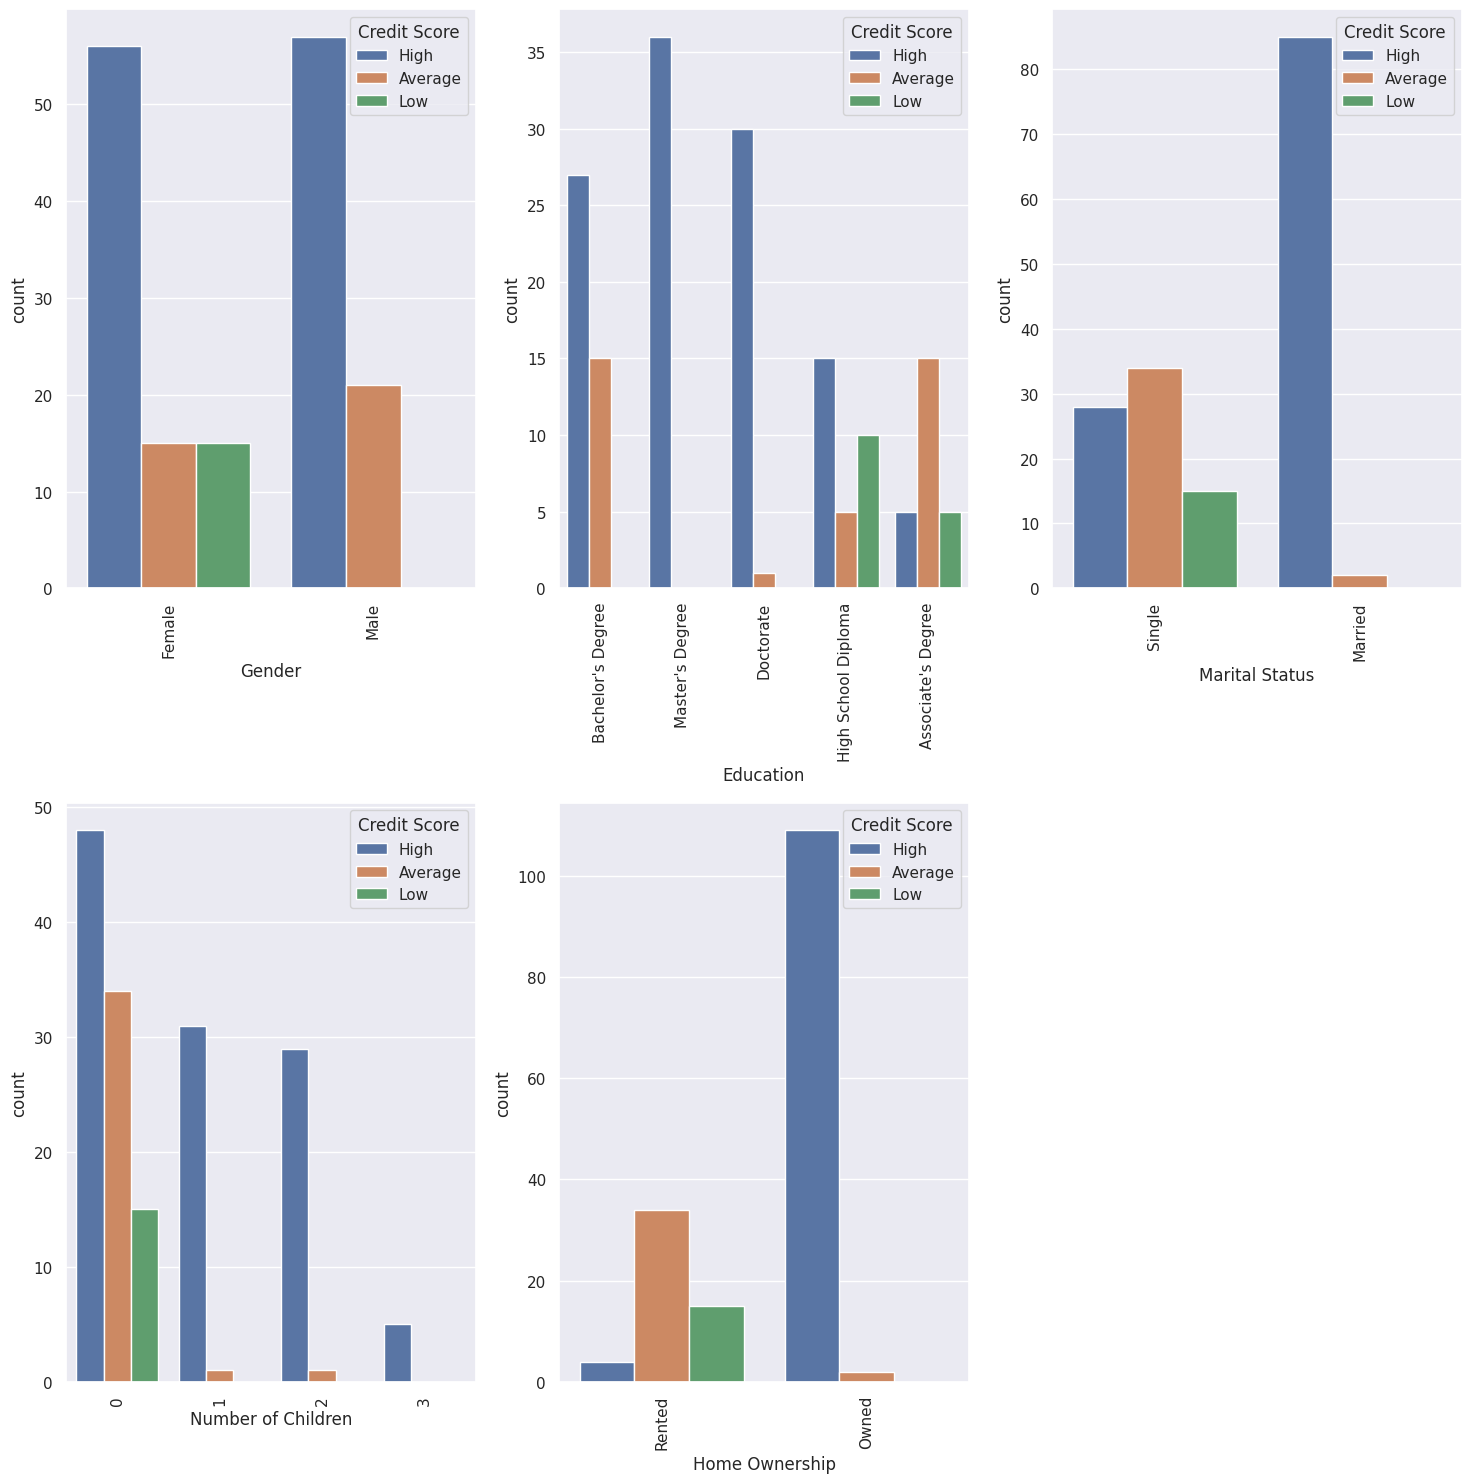

In [19]:
#List of categorical variables to plot
cat_vars = ['Gender', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership']

#create figure with subplots
fig, axs = plt.subplots(nrows=2 , ncols=3, figsize=(15,15))
axs = axs.flatten()

#create barplot for each categorical variable
for i, var in enumerate(cat_vars):
  sns.countplot(x=var, hue='Credit Score', data=df, ax = axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation = 90)

#adjust spacing between subplots
fig.tight_layout()

#remove the sixth subplot
fig.delaxes(axs[5])

#show plot
plt.show()

IndexError: index 5 is out of bounds for axis 0 with size 4

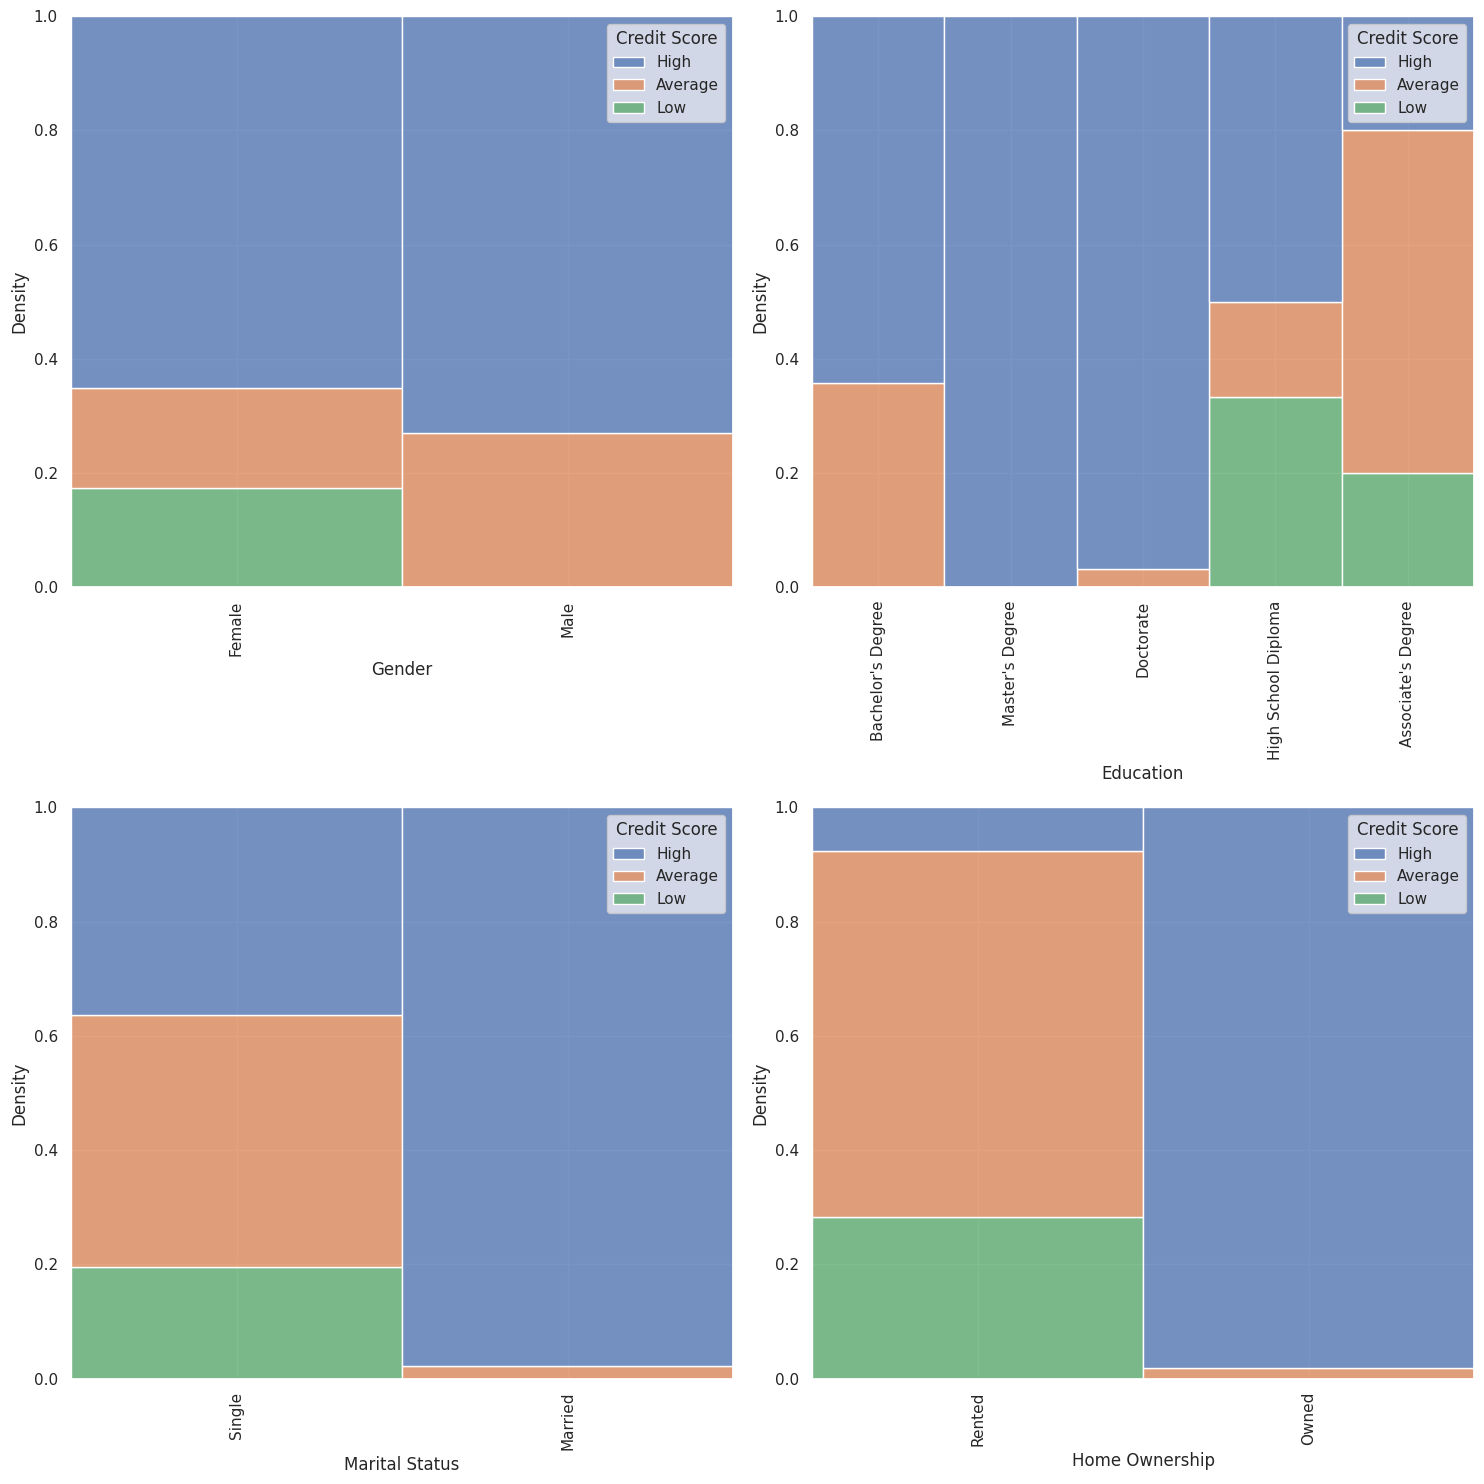

In [26]:
import warnings
warnings.filterwarnings("ignore")
#get list of categorical variables
cat_vars = ['Gender', 'Education', 'Marital Status', 'Home Ownership']

#create figure with subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axs = axs.flatten()

#create histplot for each categorical variable
for i, var in enumerate(cat_vars):
  sns.histplot(x=var, hue='Credit Score', data=df, ax=axs[i], multiple="fill", kde=False, element="bars", fill=True, stat= 'density')
  axs[i].set_xticklabels(df[var].unique(), rotation=90)
  axs[i].set_xlabel(var)

#adjust spacing between subplots
fig.tight_layout()

#remove the sixth subplot
fig.delaxes(axs[5])

#show plot
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

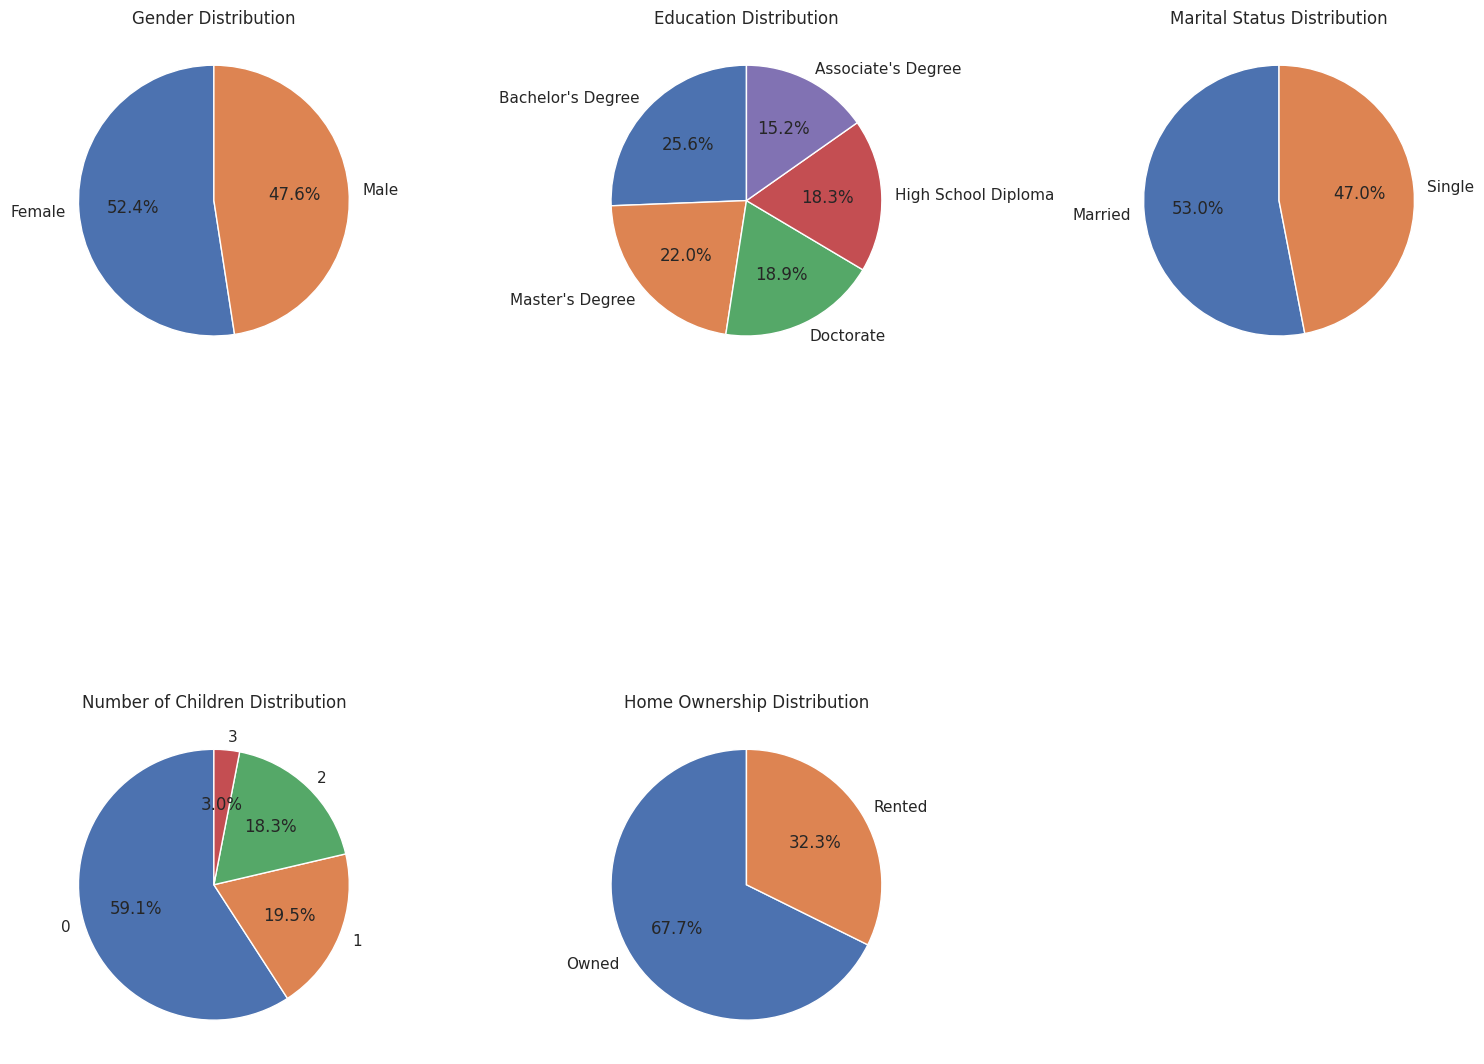

In [47]:
cat_vars = ['Gender', 'Education', 'Marital Status', 'Number of Children', 'Home Ownership']

#create a figure and axes
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 15))

#create  a pie chart for each categorical variable
for i, var in enumerate(cat_vars):
  if i < len(axs.flat):
    #count the number of occurrences for each category
    cat_counts = df[var].value_counts()

    #create a pie chart
    axs.flat[i].pie(cat_counts, labels=cat_counts.index, autopct='%1.1f%%', startangle=90)

    #set a title for each subplot
    axs.flat[i].set_title(f'{var} Distribution')

#Adjust spacing between subplots
fig.tight_layout()
fig.delaxes(axs[1][2])


#show plot
plt.show

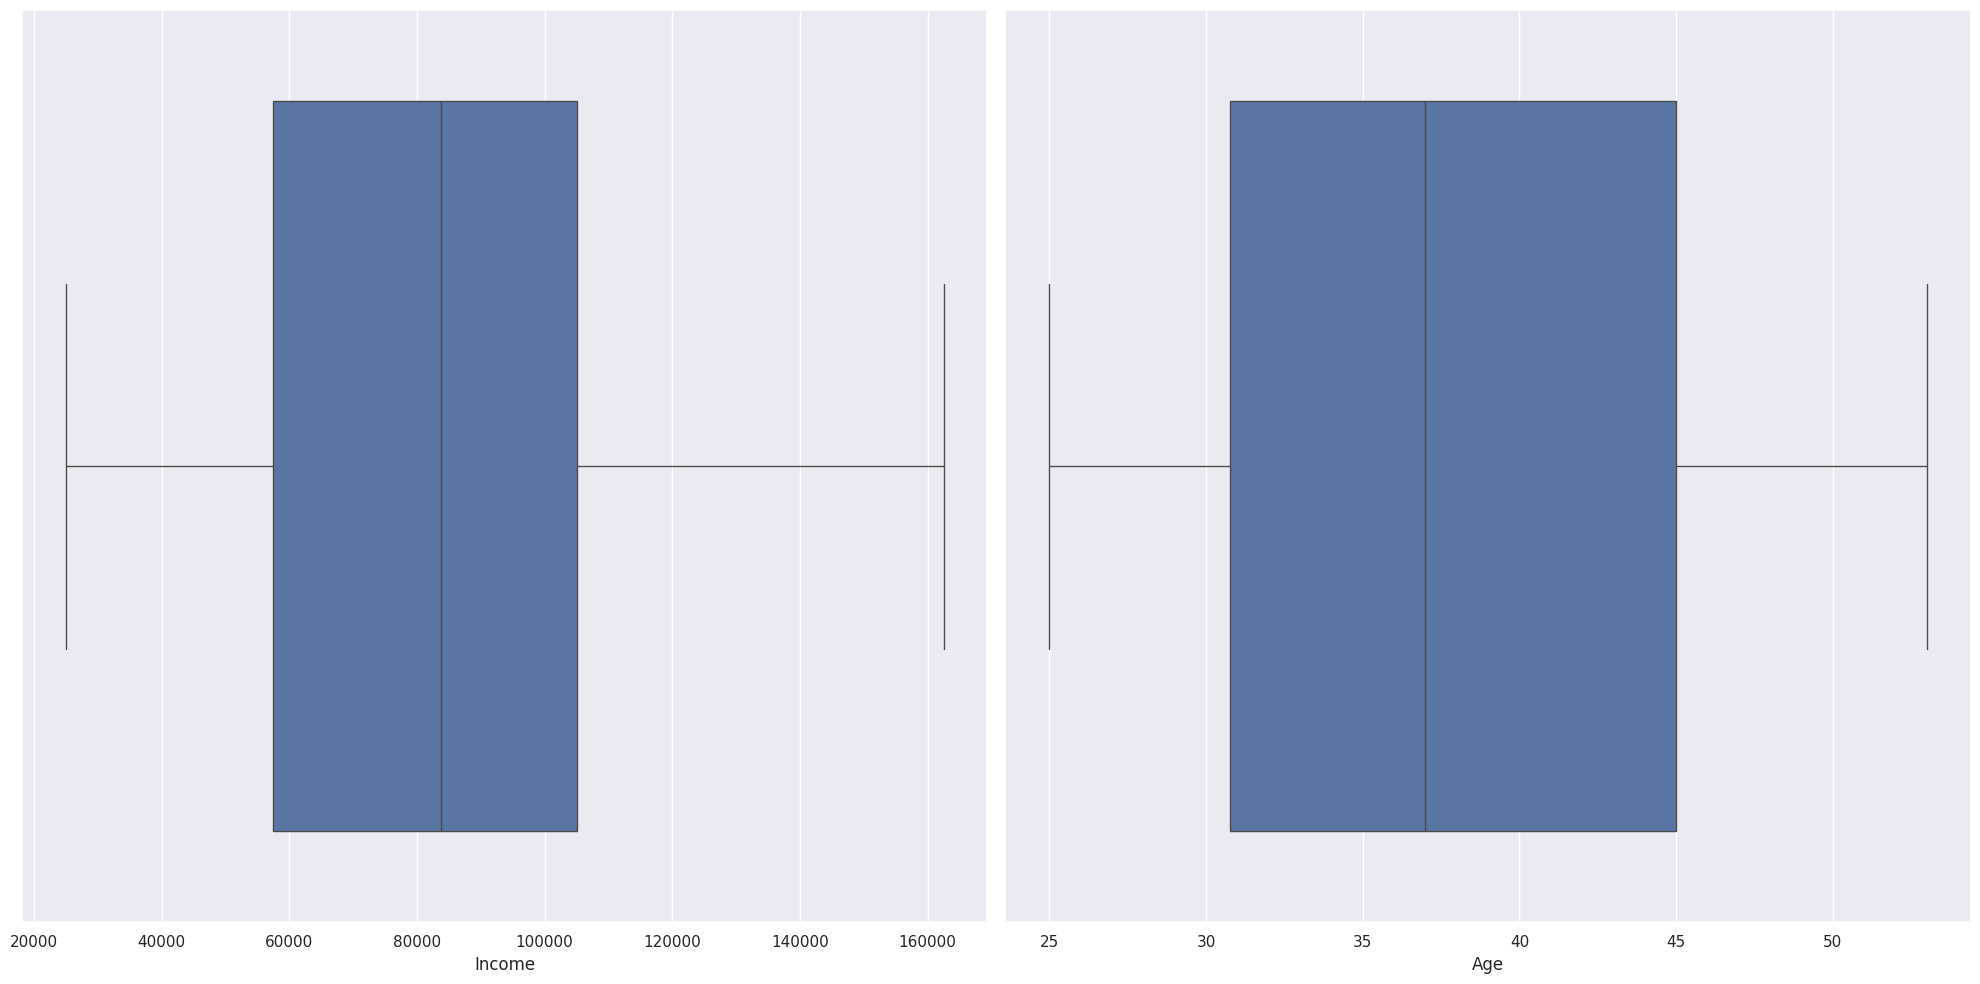

In [49]:
num_vars = {'Income', 'Age'}
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.boxplot(x=var, data=df, ax=axs[i])

fig.tight_layout()

plt.show()

IndexError: index 8 is out of bounds for axis 0 with size 2

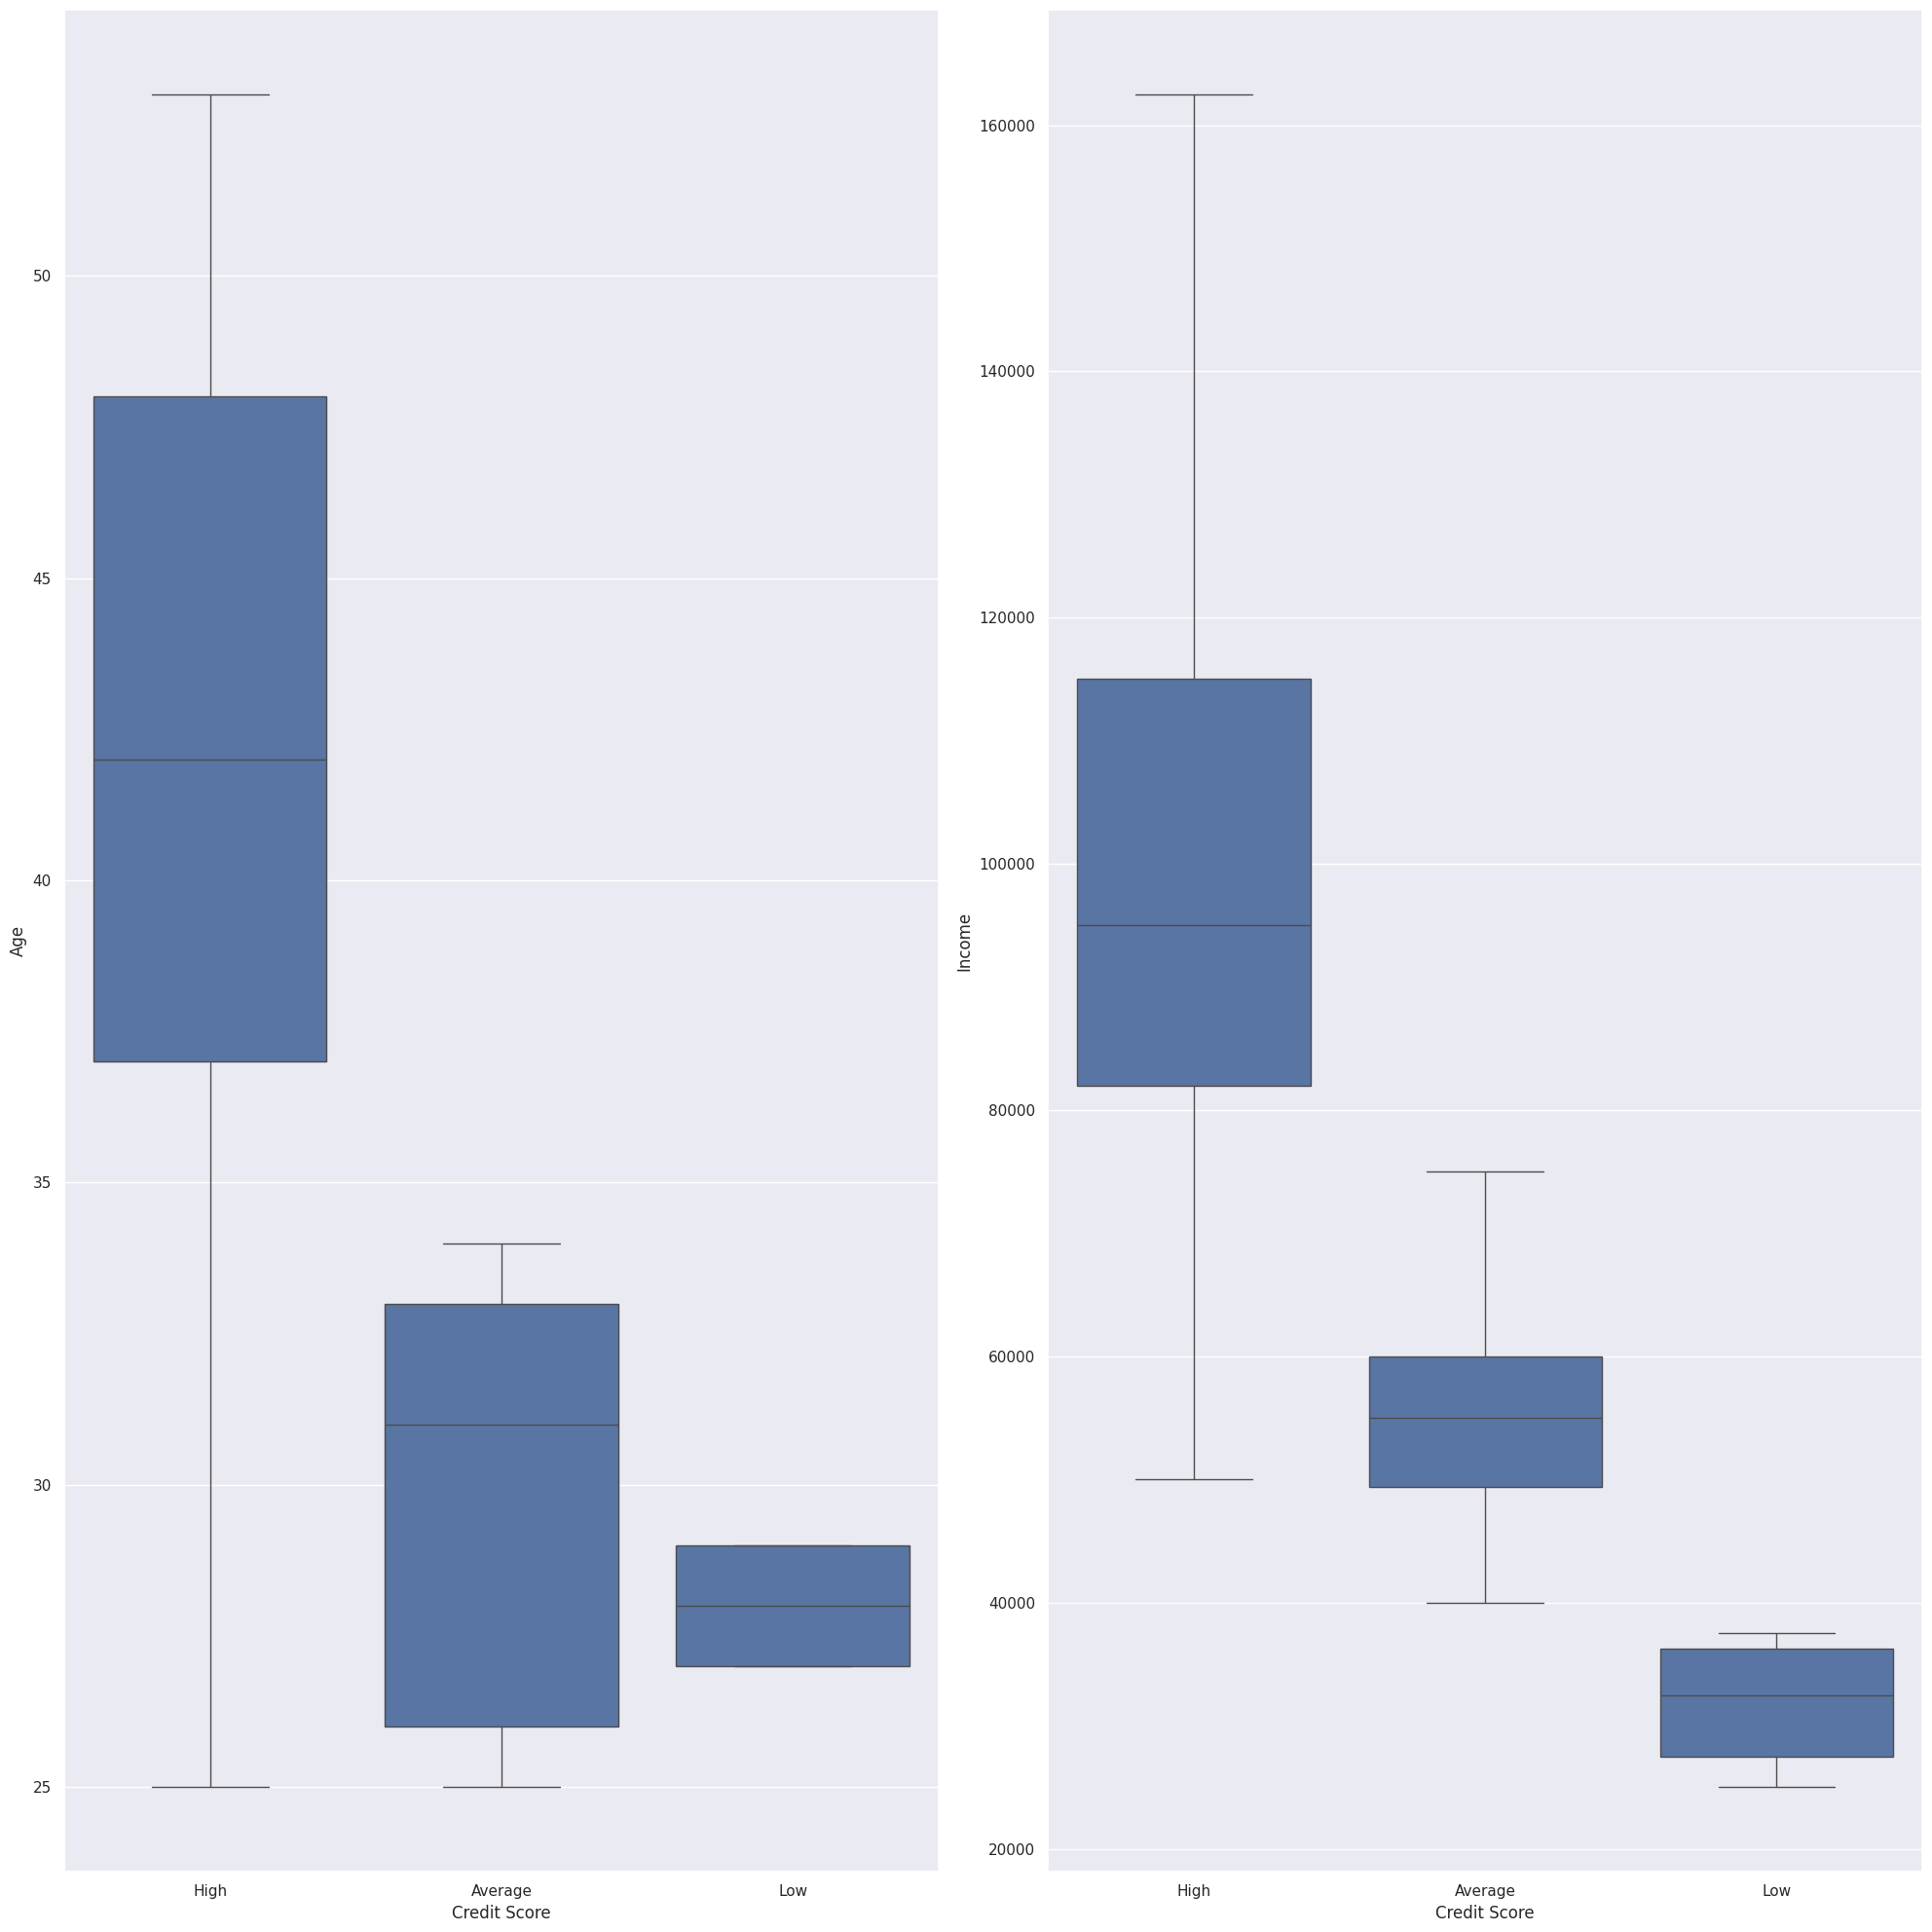

In [51]:
num_vars = ['Age', 'Income']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.boxplot(y=var, x='Credit Score', data=df, ax=axs[i])

fig.tight_layout()

fig.delaxes(axs[8])
plt.show()

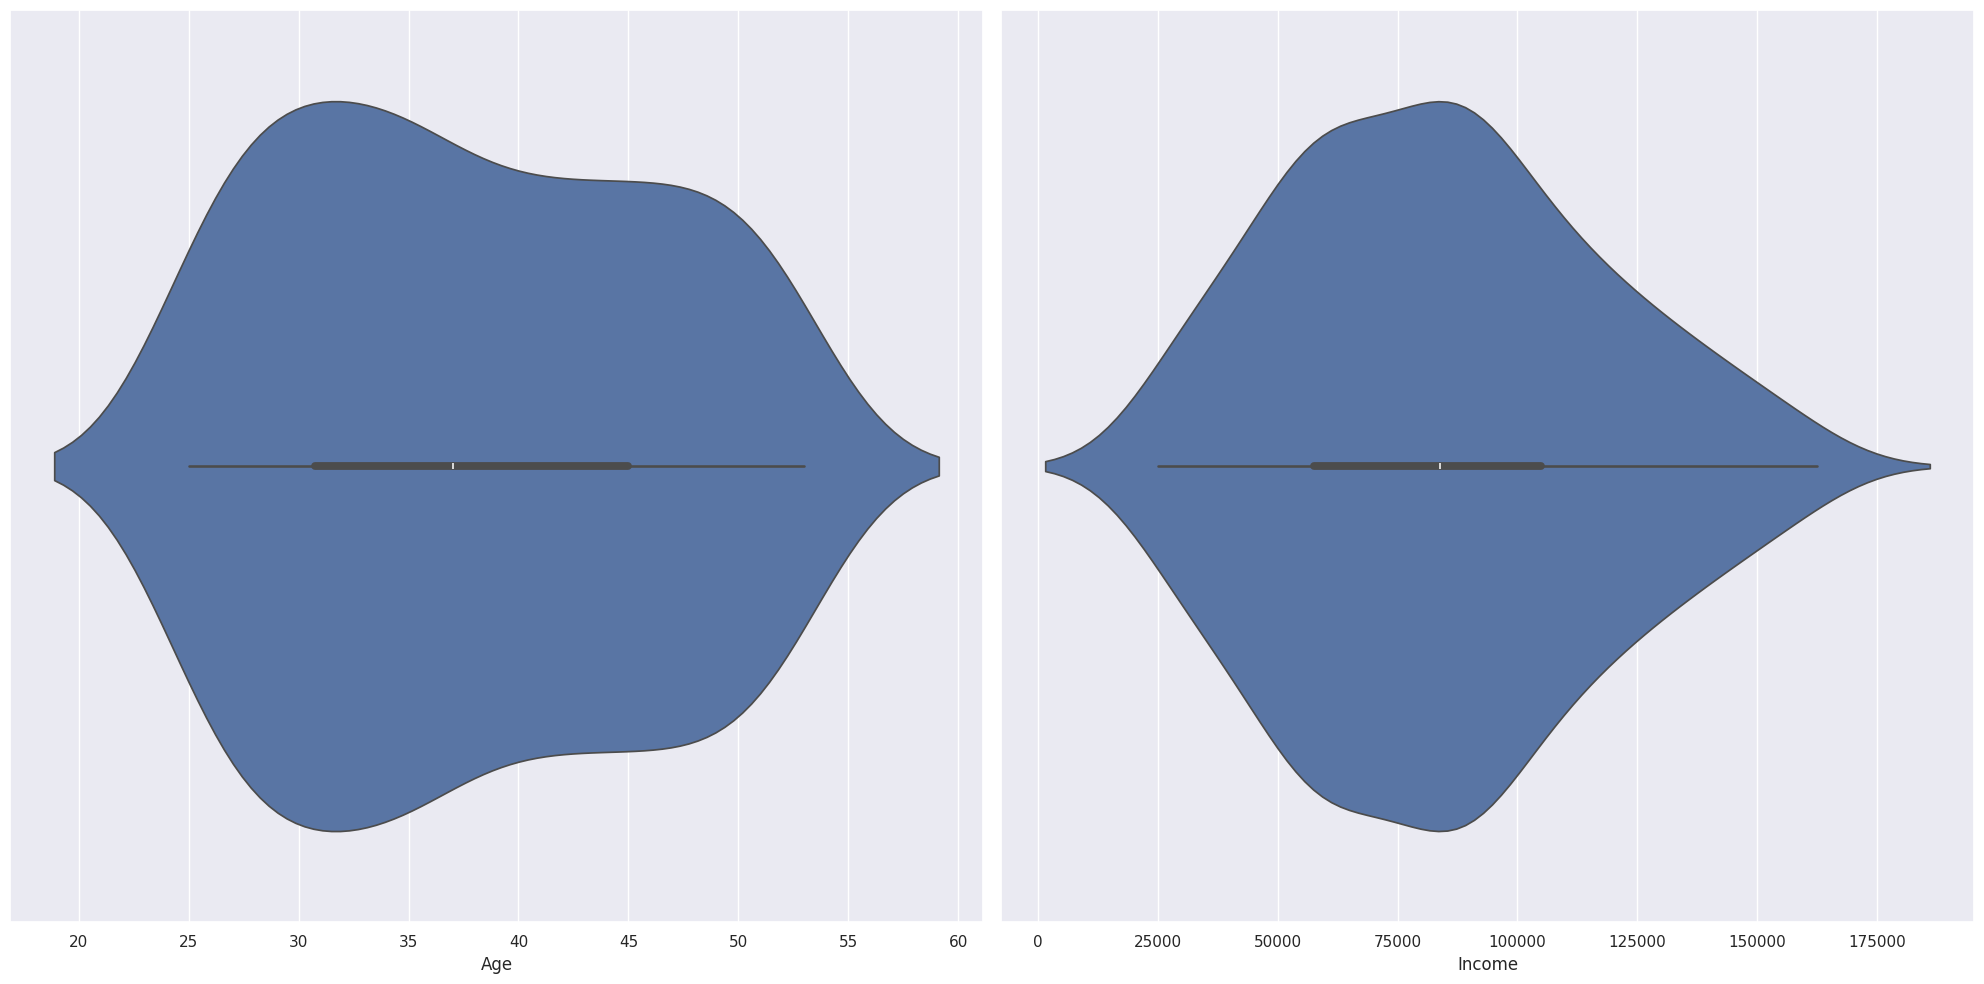

In [52]:
num_vars = ['Age', 'Income']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.violinplot(x=var, data=df, ax=axs[i])

fig.tight_layout()
plt.show()

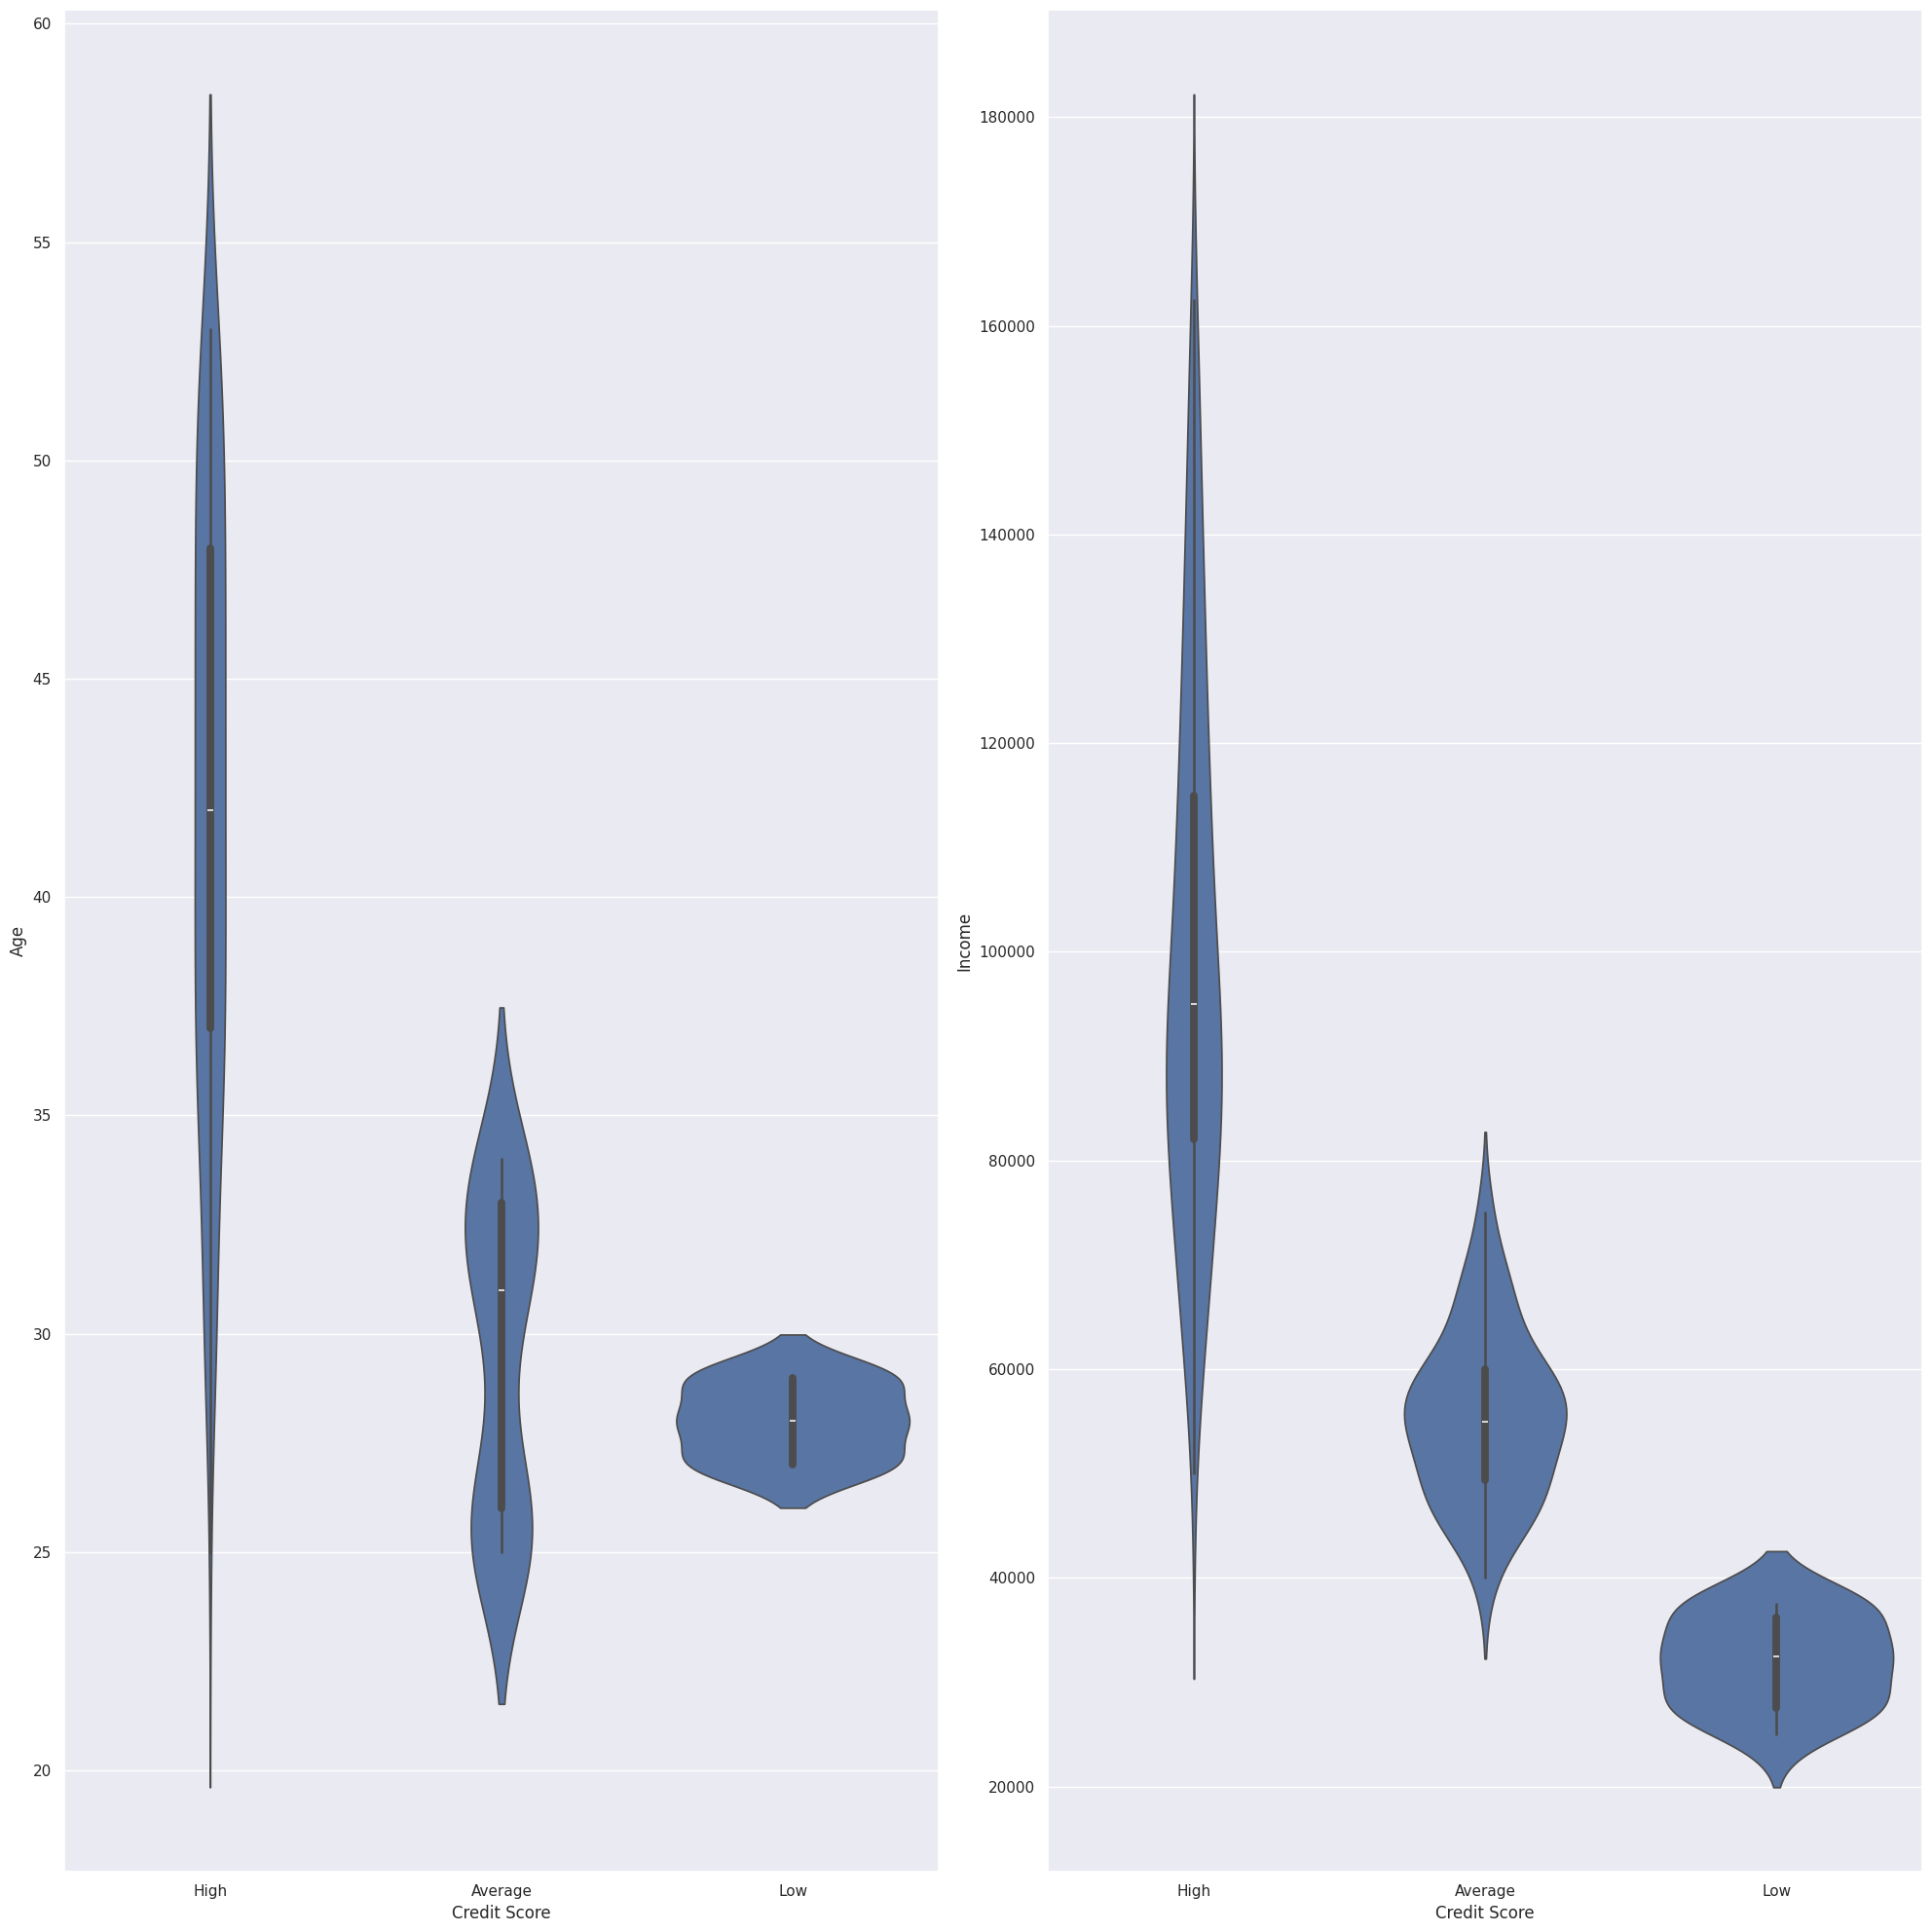

In [55]:
num_vars = ['Age', 'Income']

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,20))
axs = axs.flatten()

for i, var in enumerate(num_vars):
  sns.violinplot(y=var, x='Credit Score', data=df, ax=axs[i])

fig.tight_layout()

plt.show()

**DATA PREPROCESSING**

In [56]:
#check missing values
check_missing = df.isnull().sum() * 100/ df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

Series([], dtype: float64)

**Label Encoding for object datatypes**

In [58]:
#loop over each column in the Dataframe where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

  #print the column name and the unique values
  print(f"{col}: {df[col].unique()}")

Gender: ['Female' 'Male']
Education: ["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Marital Status: ['Single' 'Married']
Home Ownership: ['Rented' 'Owned']
Credit Score: ['High' 'Average' 'Low']


In [59]:
from sklearn import preprocessing

#loop over each column in the dataframe where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

  #Initialize a LabelEncoder object
  label_encoder = preprocessing.LabelEncoder()

  #fit the encoder to the unique values in the column
  label_encoder.fit(df[col].unique())

  #Transform the column using the encoder
  df[col] = label_encoder.transform(df[col])

  #print the column name and the unique encoded values
  print(f"{col}: {df[col].unique()}")

Gender: [0 1]
Education: [1 4 2 3 0]
Marital Status: [1 0]
Home Ownership: [1 0]
Credit Score: [1 0 2]


**THERE IS NO OUTLIER SO WE DONT HAVE TO REMOVE**

**CORRELATION HEAP**

<Axes: >

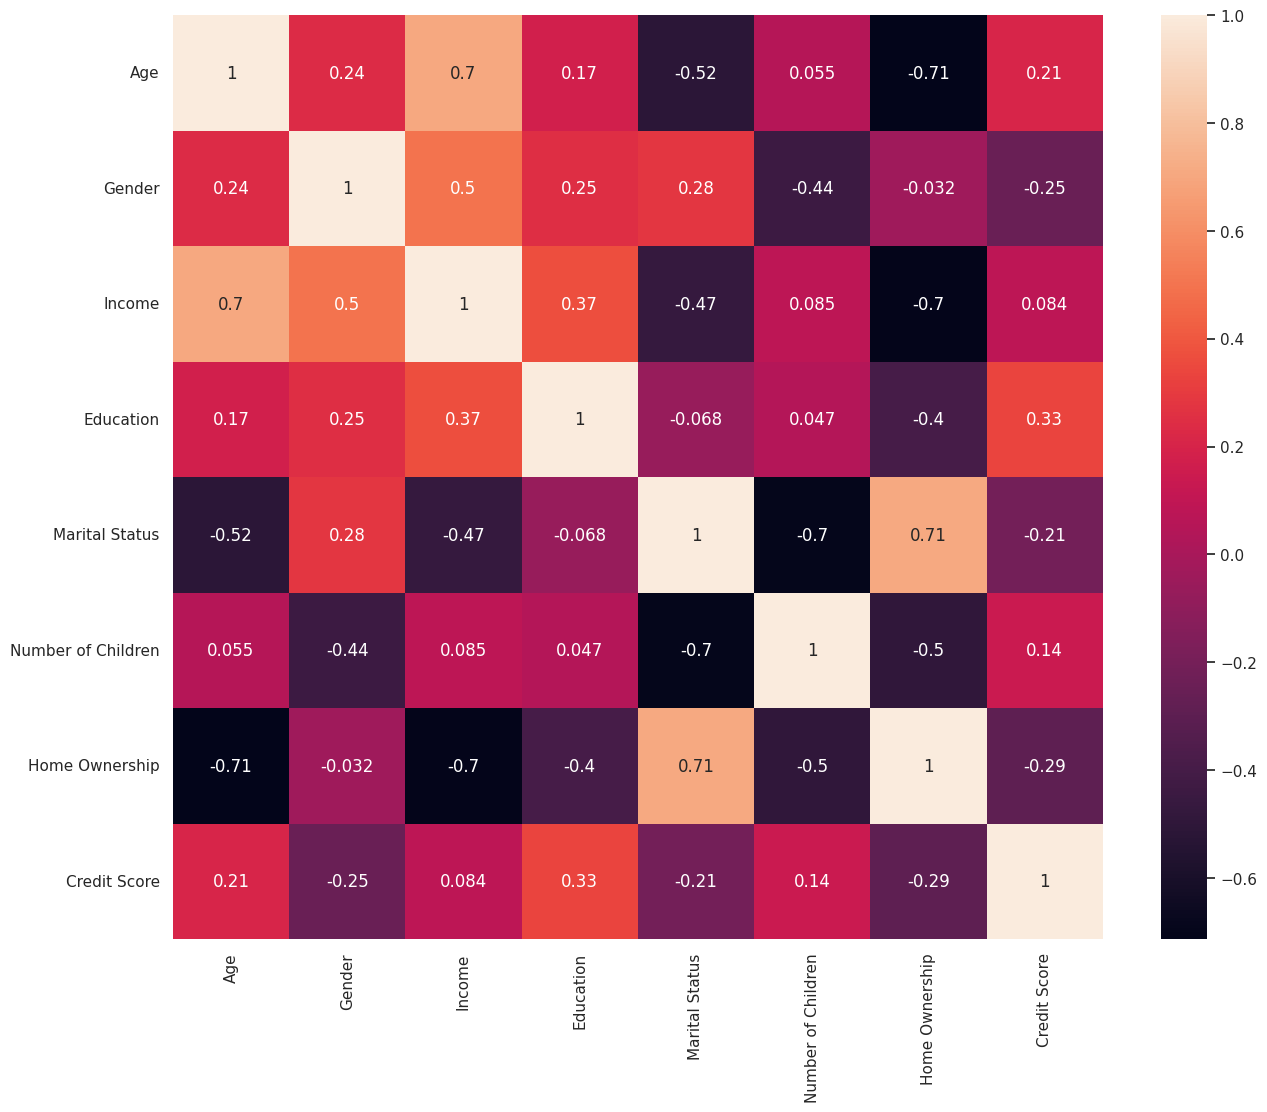

In [60]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), fmt='.2g', annot=True)

**Train Test Split**

In [61]:
x = df.drop('Credit Score', axis=1)
y = df['Credit Score']

In [63]:
#test size 30% and train size 70%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=0)

**DECISION TREE**


In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtree = DecisionTreeClassifier(class_weight='balanced')
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8],
    'min_samples_split' : [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'random_state': [0, 42]
}

#perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(dtree, param_grid, cv=5)
grid_search.fit(x_train, y_train)

#print the best hyperparameters
print(grid_search.best_params_)


{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 0}


In [65]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(random_state=0, max_depth=3, min_samples_leaf=1, min_samples_split=2, class_weight='balanced')
dtree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=3, random_state=0)

In [66]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100, 2), "%")

Accuracy Score : 96.97 %


In [69]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score,
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.9696969696969697
Precision Score :  0.9696969696969697
Recall Score :  0.9696969696969697
Jaccard Score :  0.9411764705882353


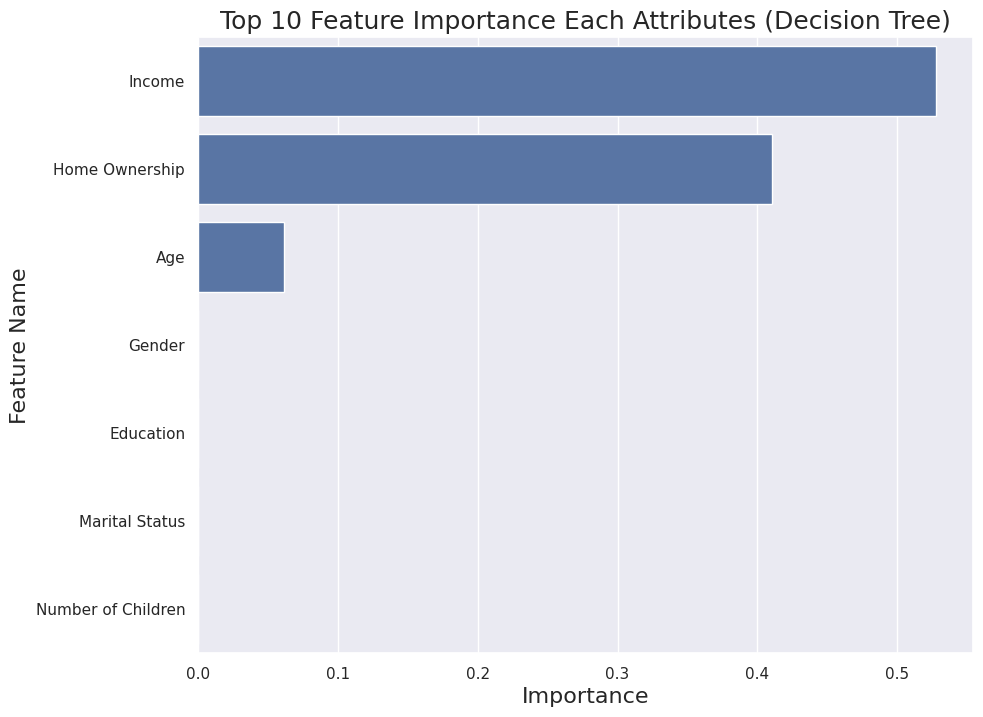

In [70]:
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Decision Tree)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

In [72]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 8.9 MB/s eta 0:00:00


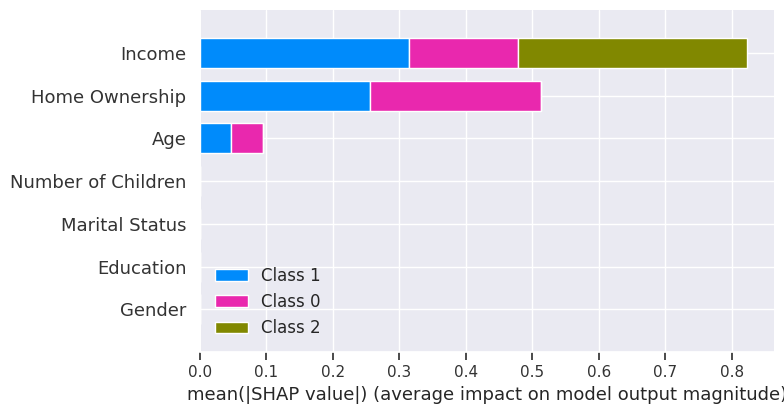

In [74]:
import shap
explainer = shap.TreeExplainer(dtree)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)


Text(0.5, 1.0, 'Accuracy score for Decision Tree: 0.9696969696969697')

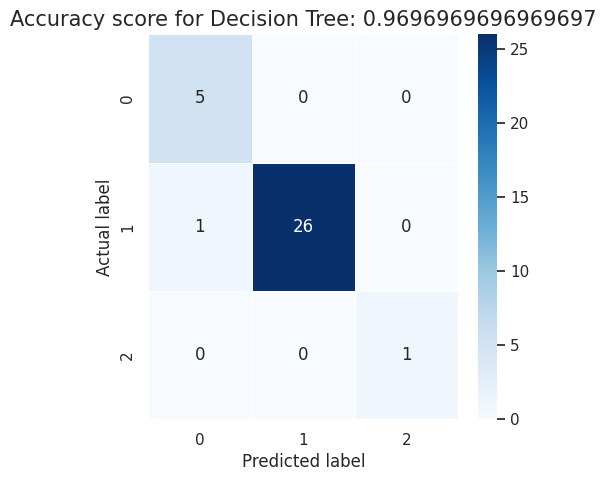

In [77]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score for Decision Tree: {0}'.format(dtree.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

**RANDOM FOREST**

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(class_weight='balanced')
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 100, 'random_state': 0}


In [107]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0, n_estimators=100, class_weight='balanced')
rfc.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=0)

In [108]:
y_pred = rfc.predict(x_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 , 2), "%")

Accuracy Score : 96.97 %


In [109]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, jaccard_score
print('F-1 Score : ',(f1_score(y_test, y_pred, average='micro')))
print('Precision Score : ',(precision_score(y_test, y_pred, average='micro')))
print('Recall Score : ',(recall_score(y_test, y_pred, average='micro')))
print('Jaccard Score : ',(jaccard_score(y_test, y_pred, average='micro')))

F-1 Score :  0.9696969696969697
Precision Score :  0.9696969696969697
Recall Score :  0.9696969696969697
Jaccard Score :  0.9411764705882353


In [110]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming x_train and y_train are your training data
dtree = RandomForestClassifier()
dtree.fit(x_train, y_train)

# Now you can access feature importances
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)


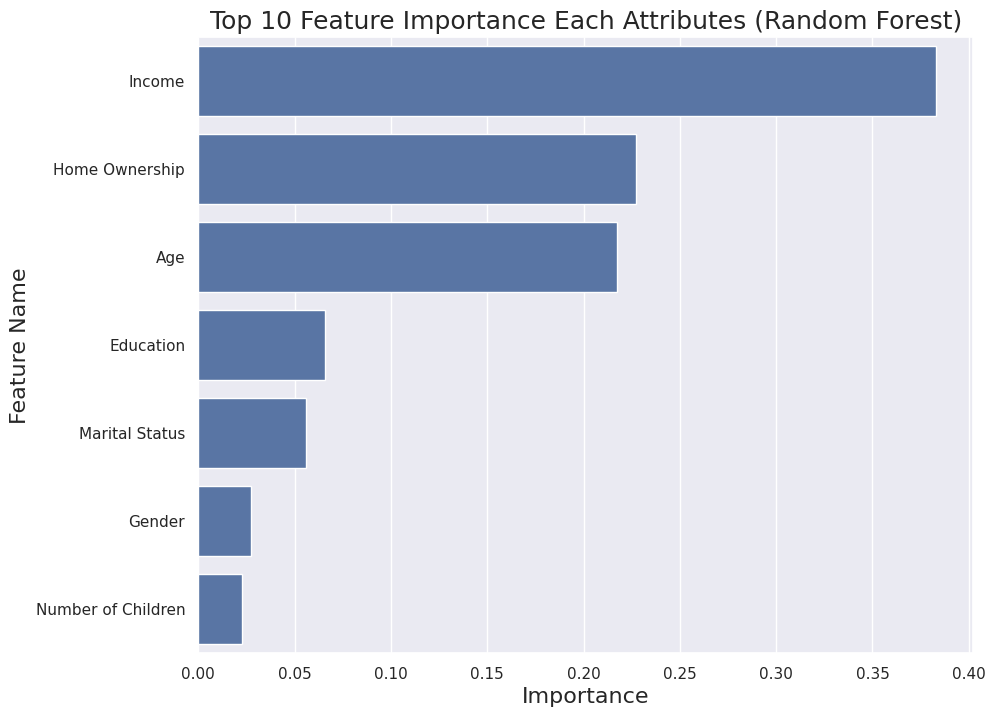

In [102]:
imp_df = pd.DataFrame({
    "Feature Name": x_train.columns,
    "Importance": dtree.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)

fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
plt.show()

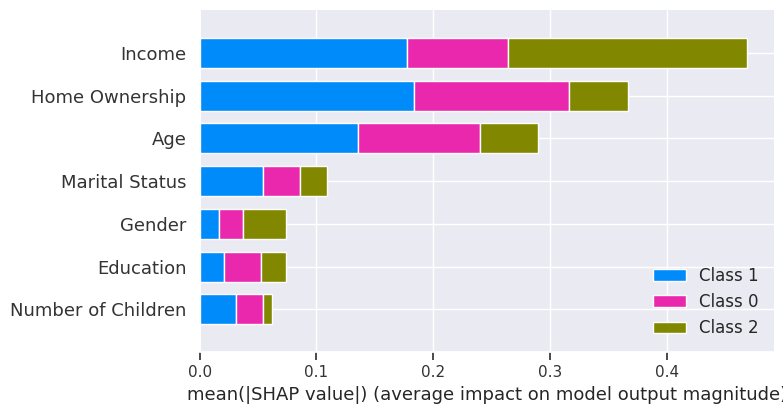

In [103]:
import shap
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(x_test)
shap.summary_plot(shap_values, x_test)


Text(0.5, 1.0, 'Accuracy score for Random Forest: 0.9696969696969697')

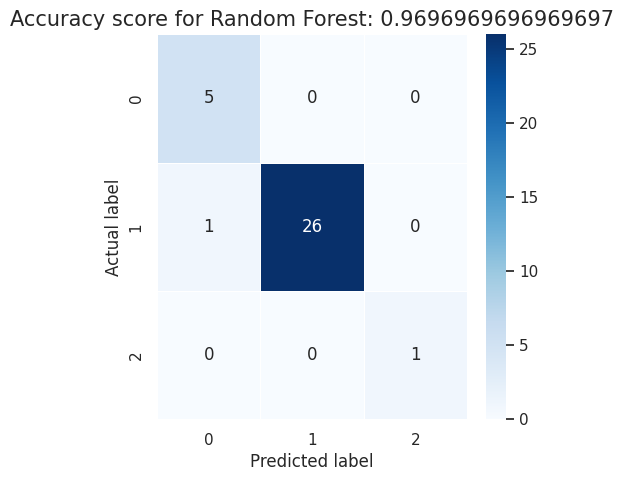

In [104]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True, cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy score for Random Forest: {0}'.format(rfc.score(x_test, y_test))
plt.title(all_sample_title, size = 15)